# Flatiron School Mod_7 project - ELT Notebook

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import notebook_toolkit as nt #external scripts for processing data
from glob import glob

## Import pagespeed result CSVs

In [2]:
filenames = glob('pagespeed_csvs/pagespeed_results_*.csv')
dataframes = [pd.read_csv(f) for f in filenames]
pagespeed_df = pd.concat(dataframes)

### Reset index & drop duplicated index

In [3]:
pagespeed_df.reset_index(inplace = True)
pagespeed_df.drop(labels = "index", inplace = True, axis = 1)

### Drop duplicate rows

In [4]:
pagespeed_df.drop_duplicates(subset = 'URL',keep='first', inplace=True)

### Drop columns with null values

In [5]:
pagespeed_df.dropna(inplace=True)

### Correct datatypes

In [6]:
for index in range(1,10):
    pagespeed_df.iloc[:,index] = pagespeed_df.iloc[:,index].astype(np.float64)

### Make Column names more useful

In [7]:
pagespeed_df.columns = (['address',
                         'first_contentful_paint',
                         'time_to_interactive',
                         'time_to_first_byte',
                         'dom_size',
                         'boot_up_time',
                         'first_meaningful_paint',
                         'speed_index',
                         'total_blocking_time',
                         'network_requests',
                         'total_byte_weight'])

### Check units are correct for the dataset 

* **Address** - URL of the page that the page speed data is about - unit: n/a
* **First Contentful Paint** - First contentful paint marks the time at which the first text or image is painted. [Learn more](https://web.dev/first-contentful-paint). - unit: **ms**
* **Time to Interactive** - First contentful paint marks the time at which the first text or image is painted. [Learn more](https://web.dev/first-contentful-paint). - unit: **ms**
* **Time to First Byte** - Time to first byte identifies the time at which your server sends a response. [Learn more](https://web.dev/time-to-first-byte). - unit: **ms**
* **DOM Size** - Browser engineers recommend pages contain fewer than ~1,500 DOM elements. The sweet spot is a tree depth \u003c 32 elements and fewer than 60 children/parent element. A large DOM can increase memory usage, cause longer [style calculations](https://developers.google.com/web/fundamentals/performance/rendering/reduce-the-scope-and-complexity-of-style-calculations) and produce costly [layout reflows](https://developers.google.com/speed/articles/reflow). [Learn more](https://web.dev/dom-size). - unit: **no. of elements**
* **Boot Up Time** - Consider reducing the time spent parsing, compiling and executing JS. You may find delivering smaller JS payloads helps with this. [Learn more](https://web.dev/bootup-time). - units **ms**
* **First Meaningful Paint** - First meaningful paint measures when the primary content of a page is visible. [Learn more](https://web.dev/first-meaningful-paint). - units **ms**
* **Speed Index** - Speed Index shows how quickly the contents of a page are visibly populated. [Learn more](https://web.dev/speed-index). - units **ms**
* **Total Blocking Time** - sum of all time periods between FCP and Time to Interactive, when task length exceeded 50ms, expressed in milliseconds. - units **ms**
* **Network Requests** - Lists the network requests that were made during page load. - units **no. of requests**
* **Total Byte Weight** - Large network payloads cost users real money and are highly correlated with long load times. [Learn more](https://web.dev/total-byte-weight). - units **bytes**

### Final Pagespeed Dataframe

In [8]:
pagespeed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70135 entries, 0 to 137496
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   address                 70135 non-null  object 
 1   first_contentful_paint  70135 non-null  float64
 2   time_to_interactive     70135 non-null  float64
 3   time_to_first_byte      70135 non-null  float64
 4   dom_size                70135 non-null  float64
 5   boot_up_time            70135 non-null  float64
 6   first_meaningful_paint  70135 non-null  float64
 7   speed_index             70135 non-null  float64
 8   total_blocking_time     70135 non-null  float64
 9   network_requests        70135 non-null  float64
 10  total_byte_weight       70135 non-null  float64
dtypes: float64(10), object(1)
memory usage: 6.4+ MB


In [9]:
pagespeed_df

,address,first_contentful_paint,time_to_interactive,time_to_first_byte,dom_size,boot_up_time,first_meaningful_paint,speed_index,total_blocking_time,network_requests,total_byte_weight
0,https://www.asdafoundation.org/,1275.0,1410.0,609.853,137.0,8.471,1410.0,2129.675696,0.0,43.0,309579.0
1,https://www.americanstampdealer.com/,908.0,908.0,883.182,676.0,36.641,908.0,1870.638039,0.0,29.0,608118.0
2,https://www.asdagoodliving.co.uk/,1035.0,1193.5,768.089,1339.0,436.294,1165.0,2184.859293,18.5,54.0,1248103.0
3,http://www.asdatoday.com/,590.0,2785.0,358.059,326.0,282.680,656.0,1180.783589,25.5,45.0,5422097.0
4,https://downdetector.co.uk/status/asda/,708.0,4630.0,385.969,2195.0,1796.401,748.0,1771.028798,60.0,326.0,2833017.0
...,...,...,...,...,...,...,...,...,...,...,...
137488,https://www.crunchbase.com/person/stephen-curry,580.0,3963.5,590.610,1921.0,2567.223,1612.0,1637.243066,973.5,85.0,1832888.0
137490,https://www.sfchronicle.com/warriors/article/S...,1219.0,10640.0,238.884,1184.0,3168.110,1219.0,4341.616309,208.0,575.0,5890014.0
137493,https://www.cbssports.com/nba/players/playerpa...,953.0,9365.5,1590.511,2298.0,4762.252,953.0,4540.687065,625.5,457.0,6759435.0
137495,https://www.khou.com/article/news/health/coron...,712.0,15833.5,402.752,1077.0,9590.345,1077.0,6676.864039,667.5,1093.0,7843296.0


## Import Ranking data csv

In [10]:
serp_df = pd.read_csv("serp_results_csvs/serp_results.csv")

### Drop irrelevant columns

In [11]:
serp_df.drop(columns="Unnamed: 0", inplace=True)

### Rename columns to something more meaningful for the merge

In [12]:
serp_df.columns = (['keyword',
                    'position',
                    'address'])

### Merge Datasets

In [13]:
final_df = pagespeed_df.merge(serp_df,on="address")

### Final Merged Dataframe

In [14]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72218 entries, 0 to 72217
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   address                 72218 non-null  object 
 1   first_contentful_paint  72218 non-null  float64
 2   time_to_interactive     72218 non-null  float64
 3   time_to_first_byte      72218 non-null  float64
 4   dom_size                72218 non-null  float64
 5   boot_up_time            72218 non-null  float64
 6   first_meaningful_paint  72218 non-null  float64
 7   speed_index             72218 non-null  float64
 8   total_blocking_time     72218 non-null  float64
 9   network_requests        72218 non-null  float64
 10  total_byte_weight       72218 non-null  float64
 11  keyword                 72218 non-null  object 
 12  position                72218 non-null  int64  
dtypes: float64(10), int64(1), object(2)
memory usage: 7.7+ MB


In [15]:
final_df

,address,first_contentful_paint,time_to_interactive,time_to_first_byte,dom_size,boot_up_time,first_meaningful_paint,speed_index,total_blocking_time,network_requests,total_byte_weight,keyword,position
0,https://www.asdafoundation.org/,1275.0,1410.0,609.853,137.0,8.471,1410.0,2129.675696,0.0,43.0,309579.0,asda,26
1,https://www.americanstampdealer.com/,908.0,908.0,883.182,676.0,36.641,908.0,1870.638039,0.0,29.0,608118.0,asda,31
2,https://www.asdagoodliving.co.uk/,1035.0,1193.5,768.089,1339.0,436.294,1165.0,2184.859293,18.5,54.0,1248103.0,asda,29
3,http://www.asdatoday.com/,590.0,2785.0,358.059,326.0,282.680,656.0,1180.783589,25.5,45.0,5422097.0,asda,36
4,https://downdetector.co.uk/status/asda/,708.0,4630.0,385.969,2195.0,1796.401,748.0,1771.028798,60.0,326.0,2833017.0,asda,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72213,https://www.crunchbase.com/person/stephen-curry,580.0,3963.5,590.610,1921.0,2567.223,1612.0,1637.243066,973.5,85.0,1832888.0,stephen curry,33
72214,https://www.sfchronicle.com/warriors/article/S...,1219.0,10640.0,238.884,1184.0,3168.110,1219.0,4341.616309,208.0,575.0,5890014.0,stephen curry,27
72215,https://www.cbssports.com/nba/players/playerpa...,953.0,9365.5,1590.511,2298.0,4762.252,953.0,4540.687065,625.5,457.0,6759435.0,stephen curry,15
72216,https://www.khou.com/article/news/health/coron...,712.0,15833.5,402.752,1077.0,9590.345,1077.0,6676.864039,667.5,1093.0,7843296.0,casto,59


## Summary

Things to watch:

* Potentially a high degree of multi colinearity between pagespeed metrics which will be challening for training a regressor
* There are duplicate pages in this dataset as it is possible for the same page to rank for different keywords, so will need to dedupe before training 
* A lot of the data is on different scales so will need to be transformed

# EDA

## Dedupe final_df for regressor training

In [16]:
final_df_regressor = final_df.drop_duplicates(subset = 'address',keep='first')

## Drop columns from final_df not needed for regressor training

In [17]:
final_df_regressor.drop(columns = ["address", "keyword", "position"], inplace=True)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## Scale dataset

In [18]:
final_df_regressor_normal = nt.norm_feat(final_df_regressor);

## Plot a corellation matrix

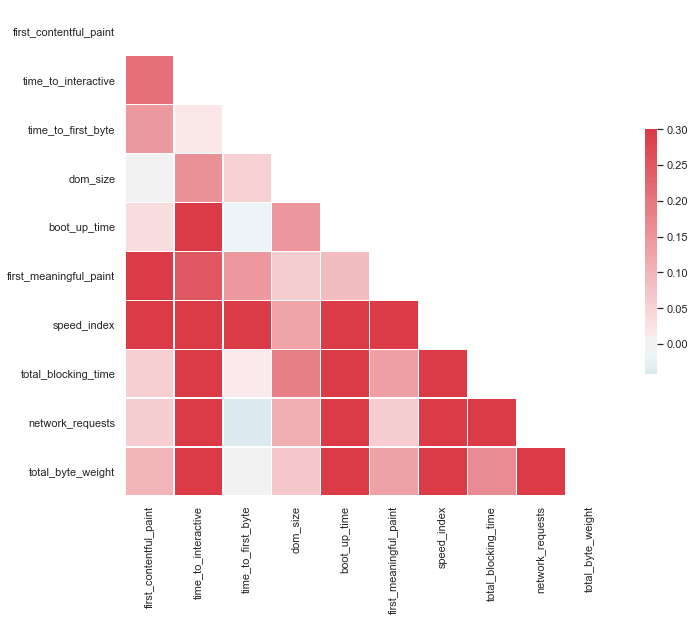

In [182]:
nt.correlation_matrix(final_df_regressor_normal); #Pearson Correlation

## Run pair plots

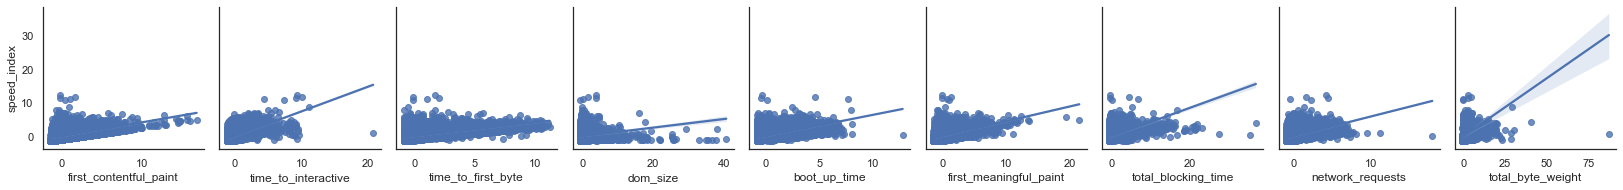

In [183]:
sns.pairplot(data = final_df_regressor_normal, 
             y_vars = "speed_index", 
             x_vars = ['first_contentful_paint',
             'time_to_interactive',
             'time_to_first_byte',
             'dom_size',
             'boot_up_time',
             'first_meaningful_paint',
             'total_blocking_time',
             'network_requests',
             'total_byte_weight'], 
             kind = 'reg');

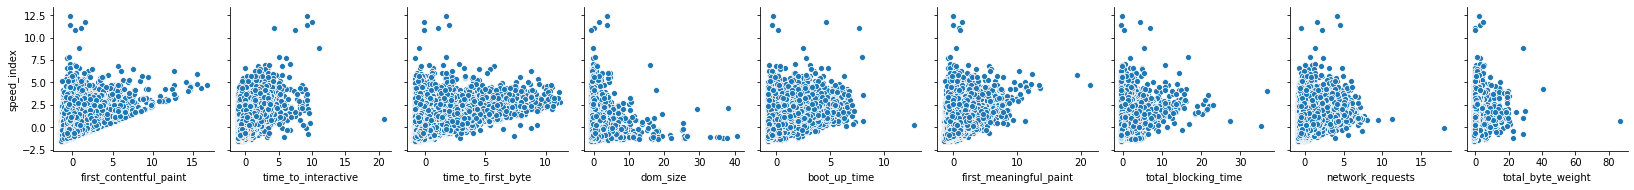

In [19]:
sns.pairplot(data = final_df_regressor_normal, 
             y_vars = "speed_index", 
             x_vars = ['first_contentful_paint',
             'time_to_interactive',
             'time_to_first_byte',
             'dom_size',
             'boot_up_time',
             'first_meaningful_paint',
             'total_blocking_time',
             'network_requests',
             'total_byte_weight']);

In [184]:
position_count = final_df.groupby('position')['address'].count()

## Number of positions vs number of websites

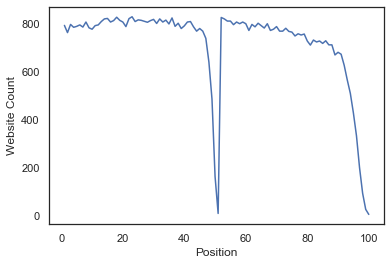

In [185]:
ax = sns.lineplot(data=position_count)
ax.set(xlabel='Position', ylabel='Website Count');

Things to think about:

* **Feature engineering** - e.g. make a new feature by combining existing features in addition to polynomials/interactions
* **Clustering** -  interesting here for segmentation of data
